In [1]:
import xarray as xr
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.ticker import FixedLocator
from cartopy.util import add_cyclic_point

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean
import glob
import os
import pandas as pd

regions = xr.open_dataset("/Users/ignasi/Desktop/Oceanography/IEO/data/RECCAP2_region_masks_all_v20221025.nc")
all_bias=xr.open_dataset('/Users/ignasi/Desktop/Oceanography/IEO/projects/cmip6_stratification/data/processed/allbias.nc')


mask_interp=regions.interp_like(all_bias, method='nearest')
mask_atl=mask_interp.atlantic>0
mask_pac=mask_interp.pacific>0
mask_ind=mask_interp.indian>0


all_bias=all_bias.load()


In [68]:

all_bias_atl=all_bias.where(mask_atl, drop=True)
all_bias_pac=all_bias.where(mask_pac, drop=True)
all_bias_ind=all_bias.where(mask_ind, drop=True)


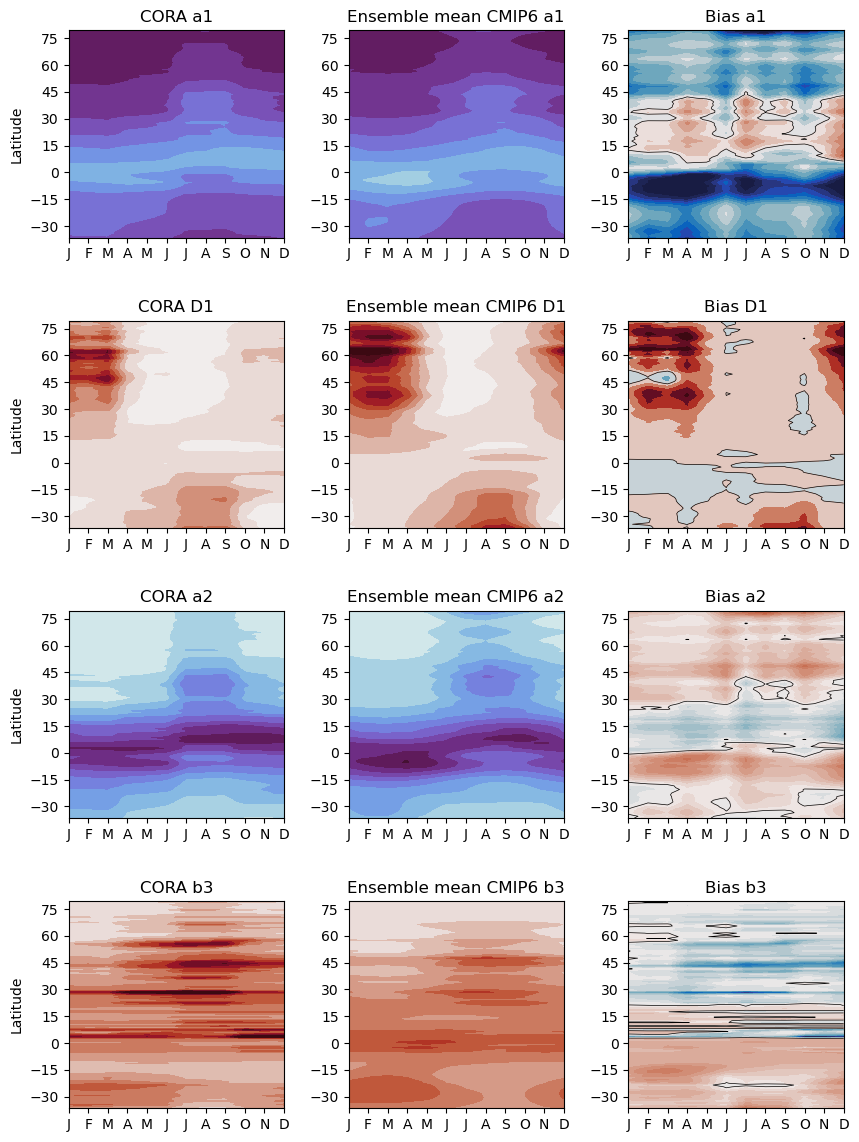

In [70]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
all_bias_b=all_bias_atl
# Create figure and gridspec layout
fig = plt.figure(figsize=(10, 14))
gs = gridspec.GridSpec(4, 3, hspace=0.4, wspace=0.3)  # 4 rows (bias types) x 3 columns (basins)


# Titles and data references for each subplot
titles = [
    'CORA a1', 'Ensemble mean CMIP6 a1', 'Bias a1',
    'CORA D1', 'Ensemble mean CMIP6 D1', 'Bias D1',
    'CORA a2', 'Ensemble mean CMIP6 a2', 'Bias a2',
    'CORA b3', 'Ensemble mean CMIP6 b3', 'Bias b3',
]

data_refs = [
    all_bias_b.a1_obs.mean('lon'), all_bias_b.a1.mean(('lon','model')), all_bias_b.bias_a1.mean(('lon','model')),
    all_bias_b.D1_obs.mean('lon'), all_bias_b.D1.mean(('lon','model')), all_bias_b.bias_D1.mean(('lon','model')),
    all_bias_b.a2_obs.mean('lon'), all_bias_b.a2.mean(('lon','model')), all_bias_b.bias_a2.mean(('lon','model')),
    all_bias_b.b3_obs.mean('lon') * 10**3, all_bias_b.b3.mean(('lon','model')) * 10**3, all_bias_b.bias_b3.mean(('lon','model'))* 10**3,
]

contour_levels = [
    np.arange(20, 30, 1),np.arange(20, 30, 1),np.arange(-1, 1.05, 0.1),
    np.arange(20, 225, 25),np.arange(20, 225, 25),np.arange(-100, 125, 25),
    np.arange(0, 5.5, 0.5),np.arange(0, 5.5, 0.5),np.arange(-2, 2.1, 0.1),
    np.arange(0, 4, 0.4),np.arange(0, 4, 0.4),np.arange(-2, 2.1, 0.1)
]

cmaps=[cmocean.cm.dense, cmocean.cm.dense, cmocean.cm.balance,
      cmocean.cm.amp,cmocean.cm.amp,cmocean.cm.balance,
      cmocean.cm.dense, cmocean.cm.dense, cmocean.cm.balance,
      cmocean.cm.amp,cmocean.cm.amp,cmocean.cm.balance]

for i in range(len(data_refs)):
    ax = fig.add_subplot(gs[i])

    ax.set_title(titles[i], loc='center', fontsize=12)
    
    # Select contour levels
    levels = contour_levels[i]
    
    # Plot contour
    data = data_refs[i]
    ax.contourf(data.month, data.lat, data.T, levels=levels, extend='both', cmap=cmaps[i])
    
    if i==2 or i==5 or i==8 or i==11:
        c=ax.contour(data.month, data.lat, data.T, levels=0, extend='both', colors='k', linewidths=0.5)
        #ax.clabel(c, inline=True, fontsize=10, fmt="%.0f", rightside_up=True, manual=[(5, 20)])
    
    ax.set_xticks(np.arange(1,13,1))
    ax.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
    if i==0 or i==3 or i==6 or i==9:
        ax.set_yticks(np.arange(-30,90,15))
        ax.set_ylabel('Latitude')
    else:
        ax.set_yticks(np.arange(-30,90,15))
        #ax.set_yticklabels([])

        

# Show the figure
plt.show()

# Add colorbar
#cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Positioning colorbar on the side
#fig.colorbar(cf, cax=cbar_ax, label="Bias Value")

#plt.show()



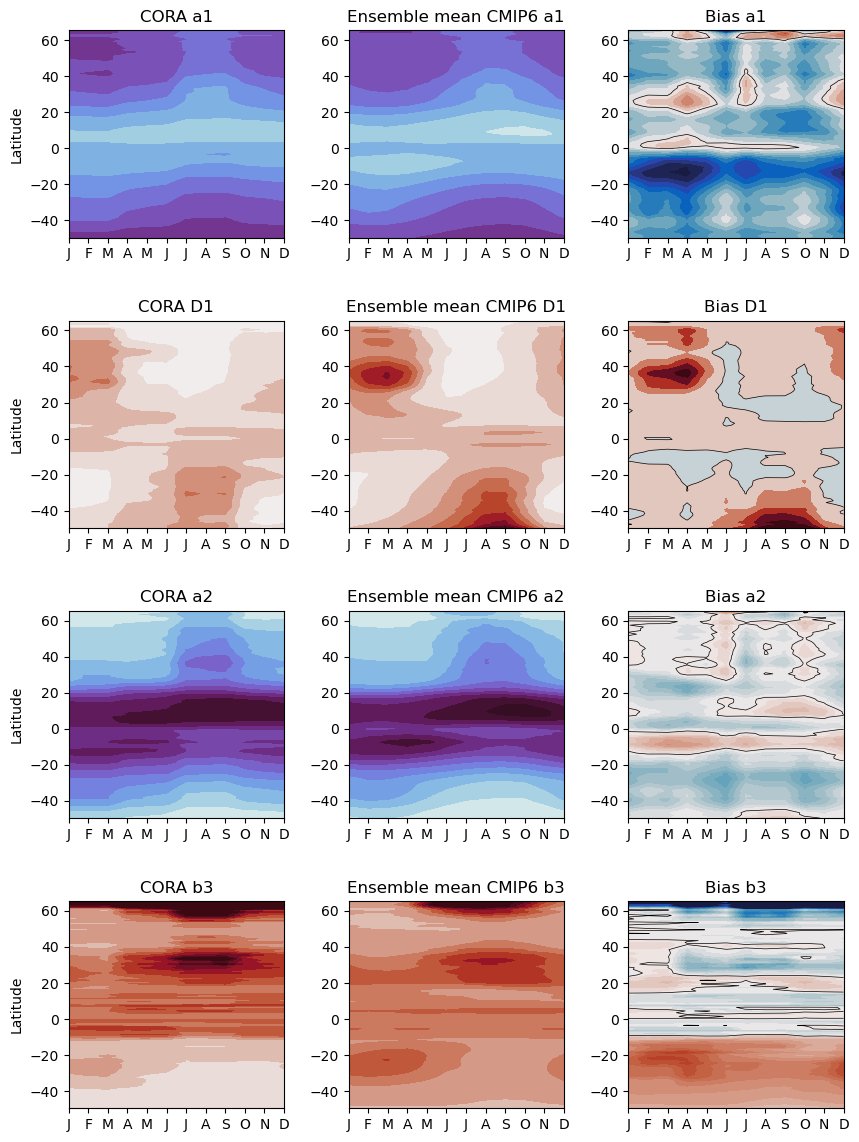

In [71]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Create figure and gridspec layout
fig = plt.figure(figsize=(10, 14))
gs = gridspec.GridSpec(4, 3, hspace=0.4, wspace=0.3)  # 4 rows (bias types) x 3 columns (basins)

all_bias_b=all_bias_pac
# Titles and data references for each subplot
titles = [
    'CORA a1', 'Ensemble mean CMIP6 a1', 'Bias a1',
    'CORA D1', 'Ensemble mean CMIP6 D1', 'Bias D1',
    'CORA a2', 'Ensemble mean CMIP6 a2', 'Bias a2',
    'CORA b3', 'Ensemble mean CMIP6 b3', 'Bias b3',
]

data_refs = [
    all_bias_b.a1_obs.mean('lon'), all_bias_b.a1.mean(('lon','model')), all_bias_b.bias_a1.mean(('lon','model')),
    all_bias_b.D1_obs.mean('lon'), all_bias_b.D1.mean(('lon','model')), all_bias_b.bias_D1.mean(('lon','model')),
    all_bias_b.a2_obs.mean('lon'), all_bias_b.a2.mean(('lon','model')), all_bias_b.bias_a2.mean(('lon','model')),
    all_bias_b.b3_obs.mean('lon') * 10**3, all_bias_b.b3.mean(('lon','model')) * 10**3, all_bias_b.bias_b3.mean(('lon','model'))* 10**3,
]

contour_levels = [
    np.arange(20, 30, 1),np.arange(20, 30, 1),np.arange(-1, 1.05, 0.1),
    np.arange(20, 225, 25),np.arange(20, 225, 25),np.arange(-100, 125, 25),
    np.arange(0, 5.5, 0.5),np.arange(0, 5.5, 0.5),np.arange(-2, 2.1, 0.1),
    np.arange(0, 4, 0.4),np.arange(0, 4, 0.4),np.arange(-2, 2.1, 0.1)
]

cmaps=[cmocean.cm.dense, cmocean.cm.dense, cmocean.cm.balance,
      cmocean.cm.amp,cmocean.cm.amp,cmocean.cm.balance,
      cmocean.cm.dense, cmocean.cm.dense, cmocean.cm.balance,
      cmocean.cm.amp,cmocean.cm.amp,cmocean.cm.balance]

for i in range(len(data_refs)):
    ax = fig.add_subplot(gs[i])

    ax.set_title(titles[i], loc='center', fontsize=12)
    
    # Select contour levels
    levels = contour_levels[i]
    
    # Plot contour
    data = data_refs[i]
    ax.contourf(data.month, data.lat, data.T, levels=levels, extend='both', cmap=cmaps[i])
    
    if i==2 or i==5 or i==8 or i==11:
        c=ax.contour(data.month, data.lat, data.T, levels=0, extend='both', colors='k', linewidths=0.5)
        #ax.clabel(c, inline=True, fontsize=10, fmt="%.0f", rightside_up=True, manual=[(5, 20)])
    
    ax.set_xticks(np.arange(1,13,1))
    ax.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
    if i==0 or i==3 or i==6 or i==9:
        ax.set_yticks(np.arange(-40,80,20))
        ax.set_ylabel('Latitude')
    else:
        ax.set_yticks(np.arange(-40,80,20))
        #ax.set_yticklabels([])

        

# Show the figure
plt.show()

# Add colorbar
#cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Positioning colorbar on the side
#fig.colorbar(cf, cax=cbar_ax, label="Bias Value")

#plt.show()



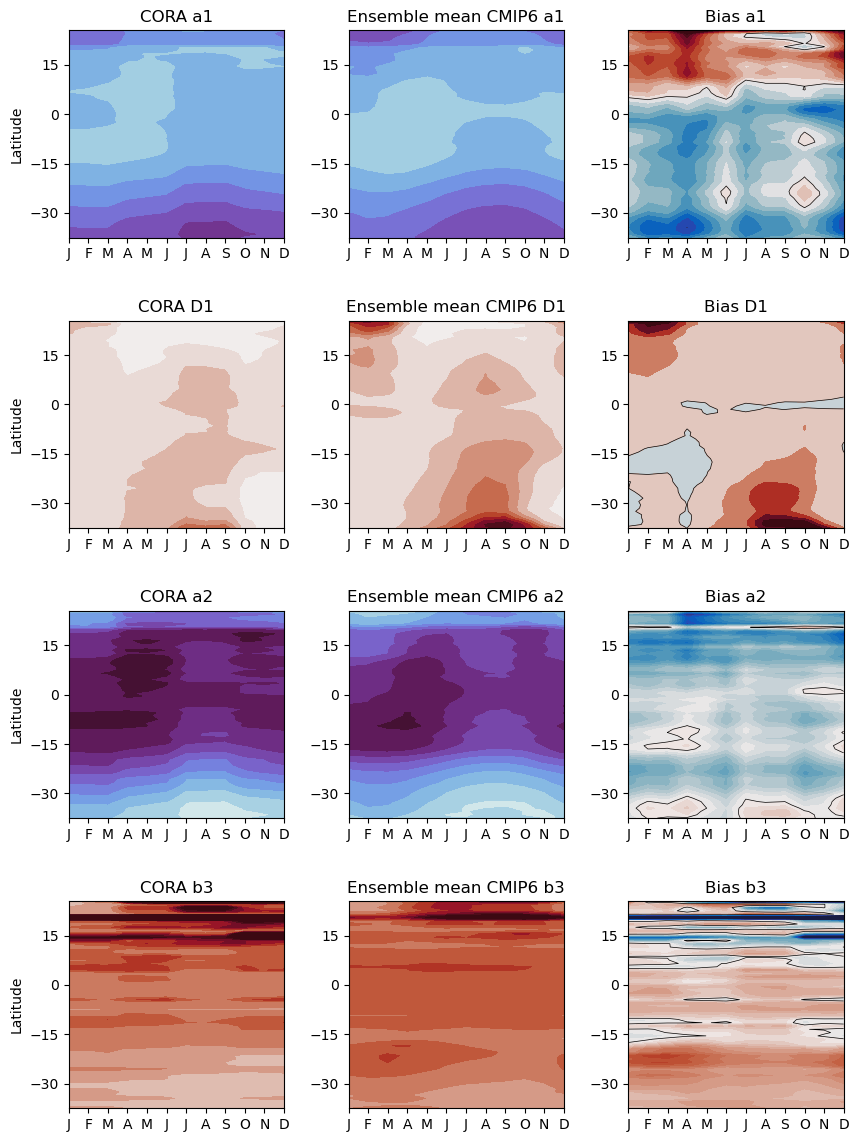

In [74]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Create figure and gridspec layout
fig = plt.figure(figsize=(10, 14))
gs = gridspec.GridSpec(4, 3, hspace=0.4, wspace=0.3)  # 4 rows (bias types) x 3 columns (basins)

all_bias_b=all_bias_ind
# Titles and data references for each subplot
titles = [
    'CORA a1', 'Ensemble mean CMIP6 a1', 'Bias a1',
    'CORA D1', 'Ensemble mean CMIP6 D1', 'Bias D1',
    'CORA a2', 'Ensemble mean CMIP6 a2', 'Bias a2',
    'CORA b3', 'Ensemble mean CMIP6 b3', 'Bias b3',
]

data_refs = [
    all_bias_b.a1_obs.mean('lon'), all_bias_b.a1.mean(('lon','model')), all_bias_b.bias_a1.mean(('lon','model')),
    all_bias_b.D1_obs.mean('lon'), all_bias_b.D1.mean(('lon','model')), all_bias_b.bias_D1.mean(('lon','model')),
    all_bias_b.a2_obs.mean('lon'), all_bias_b.a2.mean(('lon','model')), all_bias_b.bias_a2.mean(('lon','model')),
    all_bias_b.b3_obs.mean('lon') * 10**3, all_bias_b.b3.mean(('lon','model')) * 10**3, all_bias_b.bias_b3.mean(('lon','model'))* 10**3,
]

contour_levels = [
    np.arange(20, 30, 1),np.arange(20, 30, 1),np.arange(-1, 1.05, 0.1),
    np.arange(20, 225, 25),np.arange(20, 225, 25),np.arange(-100, 125, 25),
    np.arange(0, 5.5, 0.5),np.arange(0, 5.5, 0.5),np.arange(-2, 2.1, 0.1),
    np.arange(0, 4, 0.4),np.arange(0, 4, 0.4),np.arange(-2, 2.1, 0.1)
]

cmaps=[cmocean.cm.dense, cmocean.cm.dense, cmocean.cm.balance,
      cmocean.cm.amp,cmocean.cm.amp,cmocean.cm.balance,
      cmocean.cm.dense, cmocean.cm.dense, cmocean.cm.balance,
      cmocean.cm.amp,cmocean.cm.amp,cmocean.cm.balance]

for i in range(len(data_refs)):
    ax = fig.add_subplot(gs[i])

    ax.set_title(titles[i], loc='center', fontsize=12)
    
    # Select contour levels
    levels = contour_levels[i]
    
    # Plot contour
    data = data_refs[i]
    ax.contourf(data.month, data.lat, data.T, levels=levels, extend='both', cmap=cmaps[i])
    
    if i==2 or i==5 or i==8 or i==11:
        c=ax.contour(data.month, data.lat, data.T, levels=0, extend='both', colors='k', linewidths=0.5)
        #ax.clabel(c, inline=True, fontsize=10, fmt="%.0f", rightside_up=True, manual=[(5, 20)])
    
    ax.set_xticks(np.arange(1,13,1))
    ax.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
    if i==0 or i==3 or i==6 or i==9:
        ax.set_yticks(np.arange(-30,20,15))
        ax.set_ylabel('Latitude')
    else:
        ax.set_yticks(np.arange(-30,20,15))
        #ax.set_yticklabels([])

        

# Show the figure
plt.show()

# Add colorbar
#cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Positioning colorbar on the side
#fig.colorbar(cf, cax=cbar_ax, label="Bias Value")

#plt.show()

